# Image Enhancement

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage

%matplotlib inline

dataDir = './data'

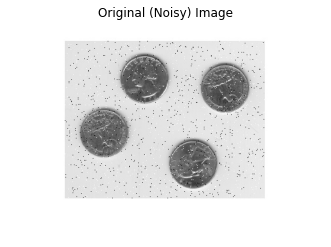

In [2]:
# Opening a noisy image
img = mpimg.imread(os.path.join(dataDir, 'coins_03_noisy.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert from BGR to RGB because we are using matplotlib to display the image
plt.imshow(img)
plt.title('Original (Noisy) Image')
plt.axis('off')
plt.show()

## 4. Filtering and Smoothing

**Challenge**

1. Download an image (colour or grayscale) of your choosing;

2. Apply salt and pepper noise to it;

3. Try smoothing the image with some of the presentented techniques;

4. Explore filtering with convolutions --- see exercise 4.e) of the exercises sheet.

[Mean Filter (Option 1)](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37)

[Mean Filter (Option 2)](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gad533230ebf2d42509547d514f7d3fbc3)

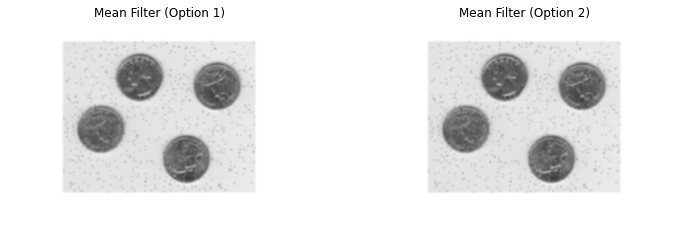

In [3]:
fig, ax = plt.subplots(1,2,figsize=(12,8))

# Using a Mean Filter (Option 1)
imgWithMeanFilter1 = cv2.blur(img, (4,4))

ax[0].imshow(imgWithMeanFilter1)
ax[0].set_title('Mean Filter (Option 1)')
ax[0].axis('off')

# Using a Mean Filter (Option 2)
imgWithMeanFilter2 = cv2.boxFilter(img, -1, (4,4))

ax[1].imshow(imgWithMeanFilter2)
ax[1].set_title('Mean Filter (Option 2)')
ax[1].axis('off')
plt.show()

[Gaussian Filter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)

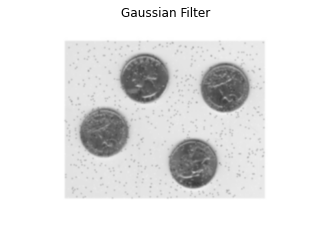

In [4]:
# Using a Gaussian Filter
imgWithGaussianFilter = cv2.GaussianBlur(img, (5,5), 0)

plt.imshow(imgWithGaussianFilter)
plt.title('Gaussian Filter')
plt.axis('off')
plt.show()

[Median Filter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9)

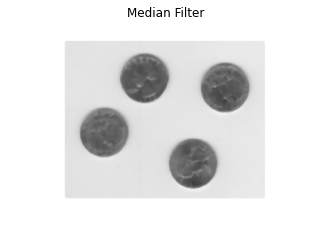

In [5]:
# Using a Median Filter
imgWithMedianFilter = cv2.medianBlur(img, 5)

plt.imshow(imgWithMedianFilter)
plt.title('Median Filter')
plt.axis('off')
plt.show()

[Bilateral Filter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed)

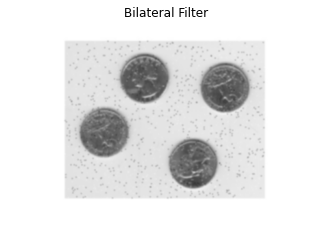

In [6]:
# Using a Bilateral Filter
imgWithBilateralFilter = cv2.bilateralFilter(img, 15, 75, 75)

plt.imshow(imgWithGaussianFilter)
plt.title('Bilateral Filter')
plt.axis('off')
plt.show()

[[0.07142857 0.14285714 0.07142857]
 [0.07142857 0.28571429 0.07142857]
 [0.07142857 0.14285714 0.07142857]]


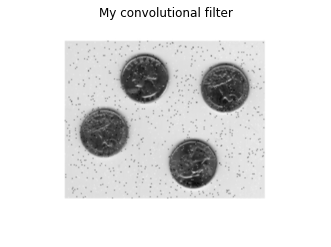

In [7]:
# Using a filter defined by me
img = cv2.imread(os.path.join(dataDir, 'coins_03_noisy.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel_3x3 = (1/14) * np.array([[1, 2, 1], [1, 4, 1], [1, 2, 1]])
print(kernel_3x3)
myConvolutionResult = ndimage.convolve(img, kernel_3x3)

plt.imshow(myConvolutionResult, cmap="gray")
plt.title('My convolutional filter')
plt.axis('off')
plt.show()

If the 1/14 factor is removed, the pixel values will not be in the original range, meaning that the mean image intensity will not be preserved.

## 5. Histogram Equalization

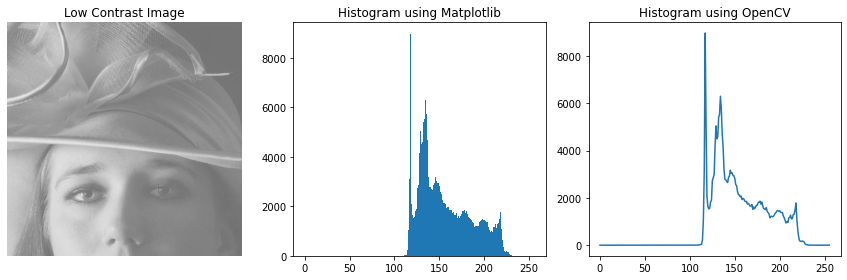

In [8]:
imgLC = cv2.imread(os.path.join(dataDir, 'face_lowContrast_01.jpg'), 0)

fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].imshow(imgLC, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Low Contrast Image')
ax[0].axis('off')

# Plotting histogram using Matplotlib
ax[1].hist(imgLC.ravel(), 256, [0,256])
ax[1].set_title('Histogram using Matplotlib')

# Plotting histogram using OpenCV
hist = cv2.calcHist([imgLC],[0],None,[256],[0,256])
ax[2].plot(hist)
ax[2].set_title('Histogram using OpenCV')

fig.tight_layout()
plt.show()

[Histograms Equalization](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e)

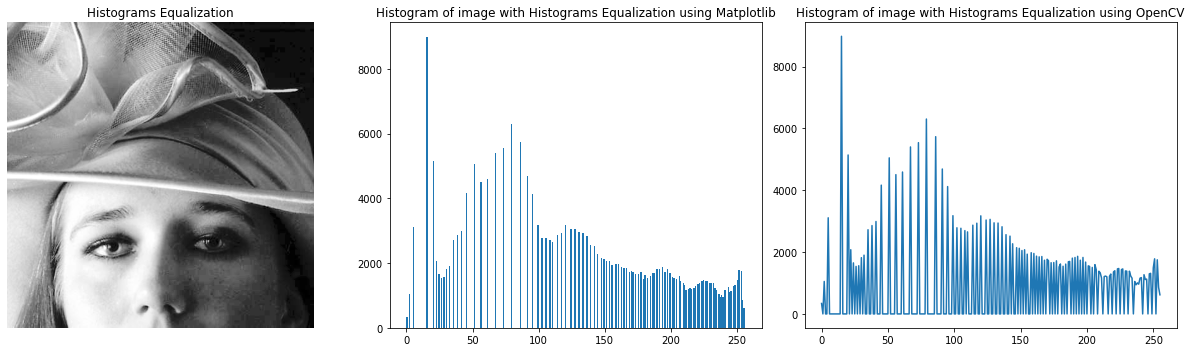

In [9]:
# Increasing Contrast with Histograms Equalization
imgLCwithHE = cv2.equalizeHist(imgLC)

fig, ax = plt.subplots(1,3, figsize=(17,5))

ax[0].imshow(imgLCwithHE, cmap="gray")
ax[0].set_title('Histograms Equalization')
ax[0].axis('off')

# Plotting histogram using Matplotlib
ax[1].hist(imgLCwithHE.ravel(), 256, [0,256])
ax[1].set_title('Histogram of image with Histograms Equalization using Matplotlib')

# Plotting histogram using OpenCV
hist = cv2.calcHist([imgLCwithHE],[0],None,[256],[0,256])
ax[2].plot(hist)
ax[2].set_title('Histogram of image with Histograms Equalization using OpenCV')

fig.tight_layout()
plt.show()

[Contrast Limited Adaptive Histogram Equalization](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#gad689d2607b7b3889453804f414ab1018)

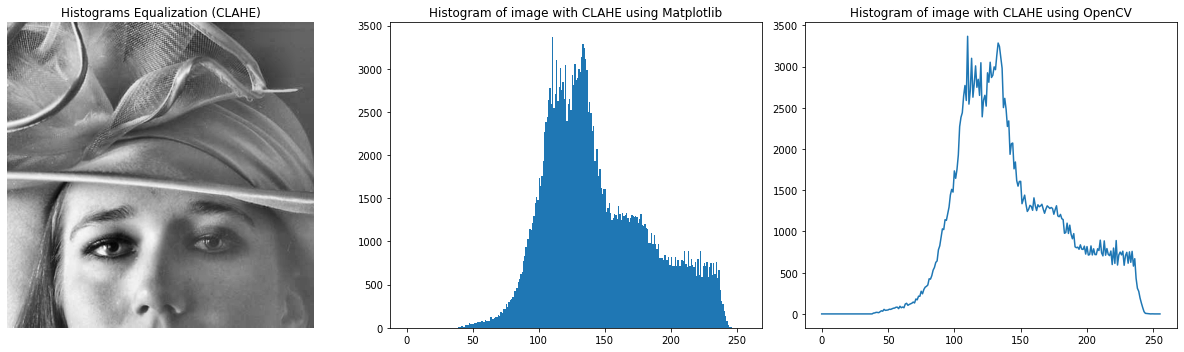

In [10]:
# Increasing Contrast with CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
imgLCwithCLAHE = clahe.apply(imgLC)

fig, ax = plt.subplots(1,3, figsize=(17,5))

ax[0].imshow(imgLCwithCLAHE, cmap="gray")
ax[0].set_title('Histograms Equalization (CLAHE)')
ax[0].axis('off')

# Plotting histogram using Matplotlib
ax[1].hist(imgLCwithCLAHE.ravel(), 256, [0,256])
ax[1].set_title('Histogram of image with CLAHE using Matplotlib')

# Plotting histogram using OpenCV
hist = cv2.calcHist([imgLCwithCLAHE],[0],None,[256],[0,256])
ax[2].plot(hist)
ax[2].set_title('Histogram of image with CLAHE using OpenCV')

fig.tight_layout()
plt.show()

**Challenge:** Repeat the process for a coloured image

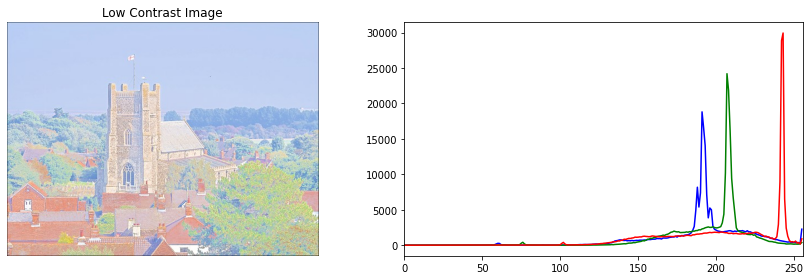

In [11]:
imgLC = cv2.imread(os.path.join(dataDir, 'lowContrast_05.jpg'))
imgLC = cv2.cvtColor(imgLC, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB in order to use Matplotlib to display the image

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].imshow(imgLC)
ax[0].set_title('Low Contrast Image')
ax[0].axis('off')

# Plotting histogram using Matplotlib
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([imgLC],[i],None,[256],[0,256])
    ax[1].plot(histr, color = col)
    ax[1].set_xlim([0,256])

fig.tight_layout()
plt.show()

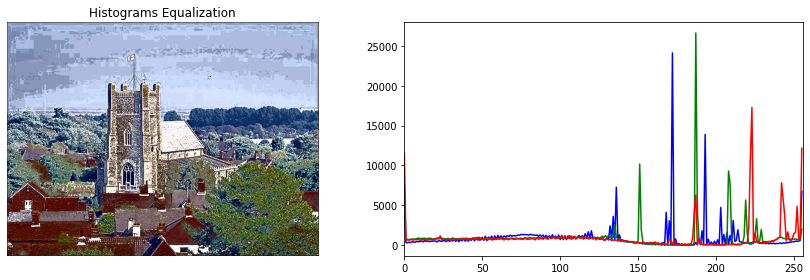

In [12]:
# Increasing Contrast with Histograms Equalization

# Equalize only the Y component of the YUV image
img_yuv = cv2.cvtColor(imgLC,cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
imgLCwithHE = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].imshow(imgLCwithHE)
ax[0].set_title('Histograms Equalization')
ax[0].axis('off')

# Plotting histogram using Matplotlib
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([imgLCwithHE],[i],None,[256],[0,256])
    ax[1].plot(histr, color = col)
    ax[1].set_xlim([0,256])

fig.tight_layout()
plt.show()

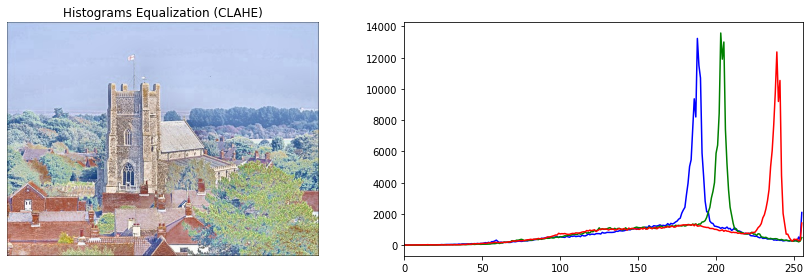

In [13]:
# Increasing Contrast with CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Equalize only the Y component of the YUV image
img_yuv = cv2.cvtColor(imgLC,cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])
imgLCwithCLAHE = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].imshow(imgLCwithCLAHE)
ax[0].set_title('Histograms Equalization (CLAHE)')
ax[0].axis('off')

# Plotting histogram using Matplotlib
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([imgLCwithCLAHE],[i],None,[256],[0,256])
    ax[1].plot(histr, color = col)
    ax[1].set_xlim([0,256])

fig.tight_layout()
plt.show()